In [1]:
from functools import reduce
from itertools import cycle
from operator import mul
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance

In [2]:
from casadi import Opti


In [3]:
import dpilqr
import util

#### 3-D trajectory simulation

In [44]:
# trajectory_data = np.load("ADMM_BVC_convex_3.npz")
trajectory_data = np.load("admm_consensus_BVC_convex_3.npz")

In [45]:
trajectory_data

NpzFile 'admm_consensus_BVC_convex_3.npz' with keys: X_full, obj_trj, obj_hist, xr

In [46]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
obj_trj = trajectory_data['obj_trj']
obj_hist = trajectory_data['obj_hist']

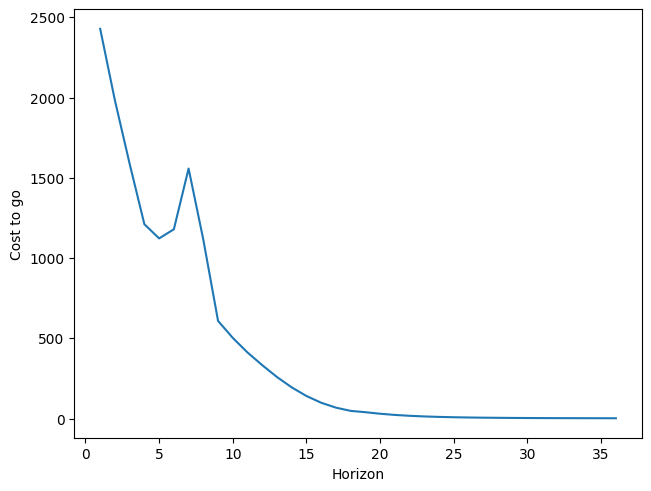

In [47]:
plt.figure(dpi=100)
plt.plot(obj_hist)
plt.xlabel('Horizon')
plt.ylabel('Cost to go')
plt.savefig('figures/3_drones_convex(cost)')

In [48]:
xr.T

array([[2.5, 1.5, 1.5, 0. , 0. , 0. , 0.5, 1.5, 1.7, 0. , 0. , 0. , 1.5,
        2.2, 1. , 0. , 0. , 0. ]])

In [49]:
dpilqr.distance_to_goal(X_full[-1].flatten(), xr.flatten(), 3, 6, 3)

array([0.097, 0.049, 0.068])

In [50]:
obj_trj

array(549.089)

In [51]:
x_dims = [6,6,6]

/tmp/ipykernel_10457/4042214855.py:9: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('figures/BVC_3_drones_success(admmMPC)', bbox_inches='tight', dpi=300)


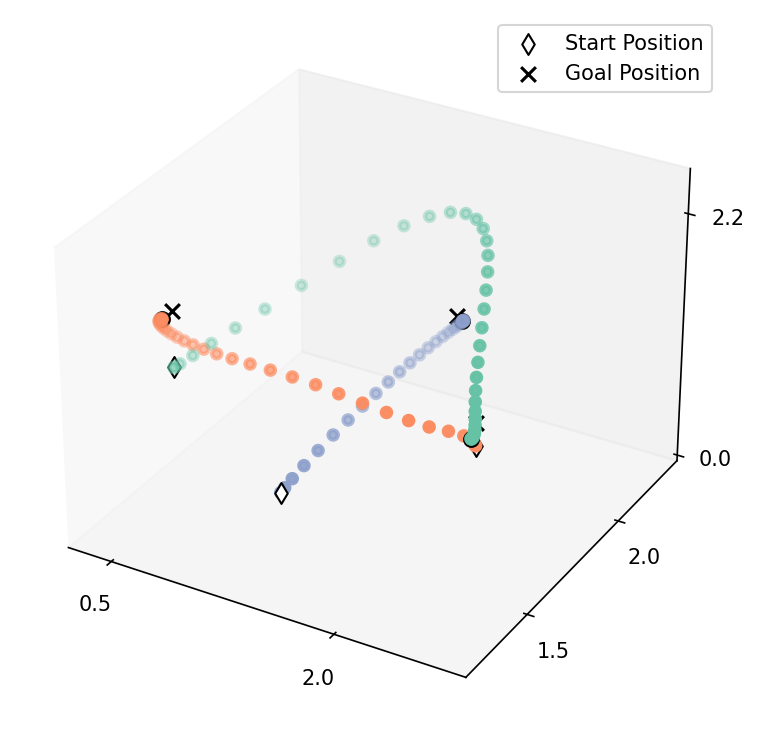

In [52]:
plt.figure(dpi=150)
util.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
plt.gca().set_xticks([0.5,2.0])
plt.gca().set_yticks([1.5,2.0])
plt.gca().set_zticks([0,2.2])
plt.gca().grid('')
plt.title("");
plt.savefig('figures/BVC_3_drones_success(admmMPC)', bbox_inches='tight', dpi=300)
# plt.show()

In [53]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.7676700981208505, 2.1196595625854084)

In [54]:
compute_pairwise_distance(X_full,x_dims).shape

(37, 3)

In [55]:
r_min= 2*0.3

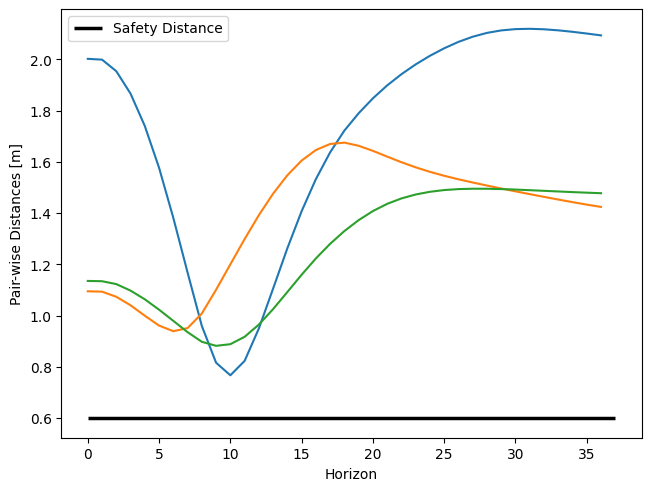

In [56]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims))
plt.hlines(r_min, 0, X_full.shape[0] ,color='k',linewidth=2.5,label='Safety Distance')
plt.ylabel('Pair-wise Distances [m]')
plt.xlabel('Horizon')
plt.legend()